In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Creating dataframe of data

In [3]:
ad = pd.read_csv("/content/Attribute DataSet.csv")
ds = pd.read_csv("/content/Dress Sales.csv")

##Removing rows with same dress ID

In [4]:
ds = ds.drop_duplicates(subset='Dress_ID', keep='first')

In [6]:
ds.shape

(475, 24)

##Setting Dress_ID as index

In [12]:
ds.set_index('Dress_ID',inplace = True)

In [16]:
ds['sum'] = ds.sum(axis = 1 , skipna = True)

In [17]:
ds.head()

,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,16/9/2013,18/9/2013,20/9/2013,22/9/2013,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2010,10/10/2013,12/10/2013,sum
Dress_ID,,,,,,,,,,,,,,,,,,,,,,,,
1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,3277,3321,3386,3479,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048,56193.0
1212192089,151,275,570,750,813,1066,1164,1558,1756,1878,1985,2106,2454,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277,40519.0
1190380701,6,7,7,7,8,8,9,10,10,10,10,10,11,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11,162.0
966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,1783,1796,1812,1845,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963,28986.0
876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,1681,1743,1824,1919,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736,33617.0


In [20]:
ds1 = pd.read_csv("/content/Dress Sales.csv")

In [30]:
is_NaN = ds.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = ds[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [29/8/2013, 31/8/2013, 2/9/2013, 4/9/2013, 6/9/2013, 8/9/2013, 10/9/2013, 12/9/2013, 14/9/2013, 16/9/2013, 18/9/2013, 20/9/2013, 22/9/2013, 24/9/2013, 26/9/2013, 28/9/2013, 30/9/2013, 2/10/2013, 4/10/2013, 6/10/2013, 8/10/2010, 10/10/2013, 12/10/2013, sum]
Index: []


##Filling NaN values 

Filled Null values in each row with avg sales of the dress

In [26]:
for i in row_has_NaN.index:
  ds.loc[i] = ds.loc[i].fillna(value = ds.loc[i]['sum']/17)

In [27]:
ds.head()

,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,16/9/2013,18/9/2013,20/9/2013,22/9/2013,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2010,10/10/2013,12/10/2013,sum
Dress_ID,,,,,,,,,,,,,,,,,,,,,,,,
1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,3277,3321,3386,3479,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048,56193.0
1212192089,151,275,570,750,813,1066,1164,1558,1756,1878,1985,2106,2454,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277,40519.0
1190380701,6,7,7,7,8,8,9,10,10,10,10,10,11,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11,162.0
966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,1783,1796,1812,1845,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963,28986.0
876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,1681,1743,1824,1919,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736,33617.0


In [28]:
ds.drop(columns=['sum'],axis = 1, inplace = True)

In [29]:
ds['sum'] = ds.sum(axis = 1 , skipna = True)

In [31]:
ad = ad.drop_duplicates(subset='Dress_ID', keep='first')

In [32]:
ad.shape

(475, 14)

In [35]:
ad.set_index('Dress_ID',inplace = True)

In [36]:
ad['sum'] = ds['sum']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##Cleaning attributes dataset

In [37]:
ad.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,sum
Dress_ID,,,,,,,,,,,,,,
1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1,56193.0
1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0,40519.0
1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0,162.0
966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1,28986.0
876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0,33617.0


###Cleaning features with duplicate classes

In [38]:
ad = ad.replace('sexy', 'Sexy', regex=True) # All data frame
ad = ad.replace('low', 'Low', regex=True) # All data frame
ad = ad.replace('high', 'High', regex=True) # All data frame
ad = ad.replace('s', 'S', regex=True) # All data frame
ad = ad.replace('small', 'S', regex=True) # All data frame
ad = ad.replace('Small', 'S', regex=True) # All data frame
ad = ad.replace('Automn', 'Autumn', regex=True) # All data frame
ad = ad.replace('modal', 'model', regex=True) # All data frame
ad = ad.replace('leapord', 'leopard', regex=True) # All data frame
ad = ad.replace('sleevless', 'sleeveless', regex=True)
ad = ad.replace('sleeevless', 'sleeveless', regex=True)
ad = ad.replace('sleveless', 'sleeveless', regex=True)
ad = ad.replace( 'threequater' ,  'threequarter', regex=True)
ad = ad.replace('threequater', 'threequarter', regex=True)
ad = ad.replace('thressqatar', 'threequarter', regex=True)
ad = ad.replace('urndowncollor', 'turndowncollor', regex=True)
ad = ad.replace('capsleeves', 'cap-sleeves', regex=True)
ad = ad.replace('half', 'halfsleeve', regex=True)
ad = ad.replace( 'halfsleevesleeve' ,  'halfsleeve', regex=True)
ad = ad.replace('halfsleevesleeve', 'halfsleeve', regex=True)
ad = ad.replace('tturndowncollor', 'turndowncollor', regex=True)
ad = ad.replace( 'sattin' ,  'satin' , regex=True)
ad = ad.replace('sattin', 'satin', regex=True)
ad = ad.replace('wollen', 'woolen', regex=True)
ad = ad.replace('knitting', 'knitted', regex=True)
ad = ad.replace('shiffon', 'chiffon', regex=True)

###Filling NULL Values

In [39]:
ad = ad.fillna({"waiseline": "natural"})
ad = ad.fillna({"Material": "cotton"})
ad = ad.fillna({"FabricType": "chiffon"})
ad = ad.fillna({"Decoration": "lace"})
ad = ad.fillna({"Pattern Type": "solid"})
ad = ad.fillna({"Price": "Average"})
ad = ad.fillna({"Season": "Summer"})
ad = ad.fillna({"NeckLine": "o-neck"})
ad = ad.fillna({"SleeveLength": "sleevless"})

In [40]:
is_NaN = ad.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = ad[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [Style, Price, Rating, Size, Season, NeckLine, SleeveLength, waiseline, Material, FabricType, Decoration, Pattern Type, Recommendation, sum]
Index: []


In [41]:
ad.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,sum
Dress_ID,,,,,,,,,,,,,,
1006032852,Sexy,Low,4.6,M,Summer,o-neck,SleevleSS,empire,cotton,chiffon,ruffleS,animal,1,56193.0
1212192089,CaSual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,chiffon,ruffleS,animal,0,40519.0
1190380701,vintage,High,0.0,L,Autumn,o-neck,full,natural,polySter,chiffon,lace,print,0,162.0
966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,Silk,chiffon,embroidary,print,1,28986.0
876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0,33617.0


##Label Encoding the categorical values

In [42]:
"""Label encoding"""
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object\
le = LabelEncoder()

In [43]:
# Get  columns whose data type is object i.e. string
filteredColumns = ad.dtypes[ad.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['Style', 'Price', 'Size', 'Season', 'NeckLine', 'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration', 'Pattern Type']


In [44]:
label_encoders = {}
for column in listOfColumnNames:
  label_encoders[column] = le
  ad[column] = label_encoders[column].fit_transform(ad[column]) 

In [45]:
ad.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,sum
Dress_ID,,,,,,,,,,,,,,
1006032852,5,2,4.6,1,2,9,4,1,7,6,22,2,1,56193.0
1212192089,1,2,0.0,0,2,9,0,2,11,6,22,2,0,40519.0
1190380701,10,1,0.0,0,0,9,9,2,17,6,14,11,0,162.0
966005983,0,0,4.6,0,1,9,9,2,1,6,10,11,1,28986.0
876339541,7,2,4.5,1,2,9,6,2,6,6,5,4,0,33617.0


##Preparing test and train data 

In [46]:
y = ad['sum']

In [47]:
ad.drop(columns=['sum'],axis = 1, inplace = True)

In [48]:
X = ad

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Applying Models

###Linear regression

In [50]:
"""Applying Linear regression"""
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
test_score = mean_absolute_error(y_test_pred,y_test)
print('test MAE = ',test_score)

test MAE =  4493.055012374572


###KNN regressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV 

In [53]:
"""Applying KNN"""
model =  KNeighborsRegressor()
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]}
grid_search = GridSearchCV(estimator = model , param_grid = param_grid, cv = 5,scoring='neg_mean_absolute_error',return_train_score=True,n_jobs =-1,verbose = 3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                         21]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=3)

In [54]:
"""Printing best params"""
print('best parameter : ',grid_search.best_params_)


best parameter :  {'n_neighbors': 15}


In [56]:
"""Applying KNN using best params"""
model =  KNeighborsRegressor(n_neighbors=15)
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
test_score = mean_absolute_error(y_test_pred,y_test)
print('test MAE = ',test_score)

test MAE =  5097.38080495356


###Decision Tree regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor


In [59]:
"""Hypertuning Decsion tree regreesor"""
model = DecisionTreeRegressor(random_state=5)
params = {'max_depth': [1, 5, 10,20,30,40, 50], 'min_samples_split': [5, 10, 100, 500,1000]}
grid_search = GridSearchCV(estimator = model , param_grid = params, cv = 3,scoring='neg_mean_absolute_error',return_train_score=True,verbose = 7,refit =True,n_jobs =-1 )
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=5, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 20, 30, 40, 50],
                         'min_samples_split': [5, 10, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [60]:
"""Printing best params"""

print('best parameter : ',grid_search.best_params_)

best parameter :  {'max_depth': 5, 'min_samples_split': 100}


In [61]:
"""Applying model with best params"""
model =  DecisionTreeRegressor(max_depth = 5 ,min_samples_split = 100 )
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
test_score = mean_absolute_error(y_test_pred,y_test)
print('test MAE = ',test_score)

test MAE =  3873.7023361055644


###Random forest regressor

In [62]:
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor


In [63]:
"""Creating param grid"""
#reference -> https://analyticsindiamag.com/guide-to-hyperparameters-tuning-using-gridsearchcv-and-randomizedsearchcv/
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}



In [64]:
""""Hypertuning Random forest """
from sklearn.model_selection import RandomizedSearchCV
rfr = RandomForestRegressor(random_state = 1)
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [65]:
"""Printing best params"""
print(rfr_random.best_params_)

{'n_estimators': 6, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}


In [66]:
"""Training with best params"""
model = RandomForestRegressor(n_estimators = 6,n_jobs = -1,max_features = 'log2' ,max_depth = 5,bootstrap = True)
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
test_score = mean_absolute_error(y_test_pred,y_test)
print('test MAE = ',test_score)

test MAE =  4531.985898512398


##ADAboost regressor

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt

In [68]:
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
abreg = AdaBoostRegressor()
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [69]:
gridsearch.best_params_

{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}

In [70]:
model = AdaBoostRegressor(learning_rate= 0.01 ,loss='linear',n_estimators=50)
model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
                  n_estimators=50, random_state=None)

In [71]:
y_test_pred = model.predict(X_test)
test_score = mean_absolute_error(y_test_pred,y_test)
print('test MAE = ',test_score)

test MAE =  4089.898435576284


##Applying the best model

In [72]:
"""Applying model with best params"""
model =  DecisionTreeRegressor(max_depth = 5 ,min_samples_split = 100 )
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
test_score = mean_absolute_error(y_test_pred,y_test)
print('test MAE = ',test_score)

test MAE =  3873.7023361055653


##Calculating Feature Importances

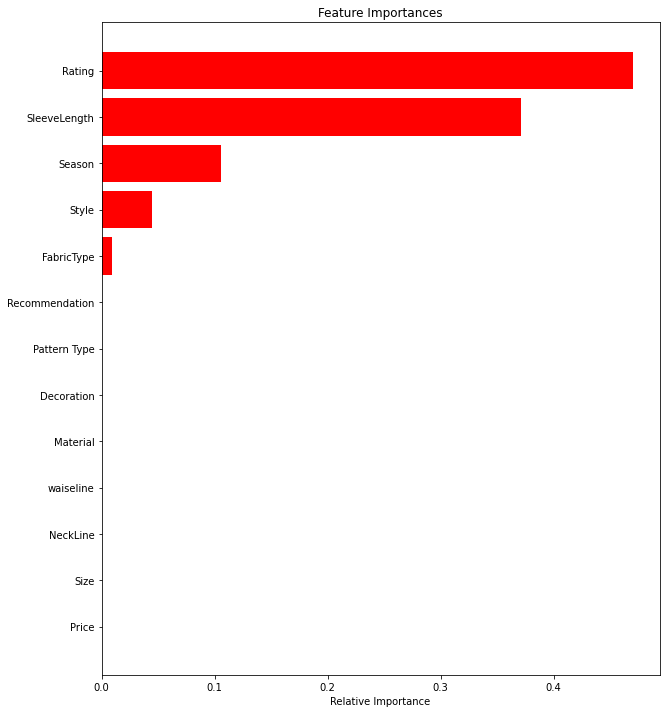

In [77]:
features = ad.columns
importances = model.feature_importances_
indices = (np.argsort(importances))[-100:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###OBSERVATIONS: - 
1. We can clearly see that Style of the dress has more influence than the price of the dress on the sales of the dress.

2. The leading factors which affect the sales of the dress are Rating , SleeveLength , Season , Style and Fabric Type
3.The rating of the dress has the maximum influence on total sales .